In [2]:
# https://blog.keras.io/building-autoencoders-in-keras.html

from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [3]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [4]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [7]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 74us/step - loss: 0.3542 - val_loss: 0.2701
Epoch 2/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.2624 - val_loss: 0.2511
Epoch 3/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.2417 - val_loss: 0.2301
Epoch 4/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.2229 - val_loss: 0.2129
Epoch 5/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.2077 - val_loss: 0.1998
Epoch 6/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.1963 - val_loss: 0.1900
Epoch 7/30
60000/60000 [==============================] - 4s 68us/step - loss: 0.1874 - val_loss: 0.1822
Epoch 8/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.1802 - val_loss: 0.1757
Epoch 9/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.1743 - val_loss: 0.1702
Epoch

In [27]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

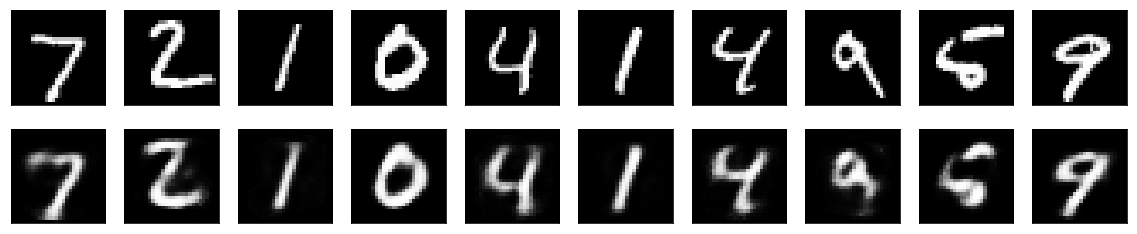

In [28]:
%matplotlib inline 

# use Matplotlib
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [31]:
autoencoder.save('models/autoencoder_model.h5')  # creates a HDF5 file 'my_model.h5'
encoder.save('models/encoder_model.h5') 
decoder.save('models/decoder_model.h5') 
del autoencoder  # deletes the existing model
del encoder
del decoder

In [1]:
from keras.models import load_model
# returns a compiled model
# identical to the previous one
autoencoder = load_model('models/autoencoder_model.h5')
encoder = load_model('models/encoder_model.h5')
decoder = load_model('models/decoder_model.h5')

Using TensorFlow backend.
c:\python\python36\lib\site-packages\keras\engine\saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [2]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [3]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

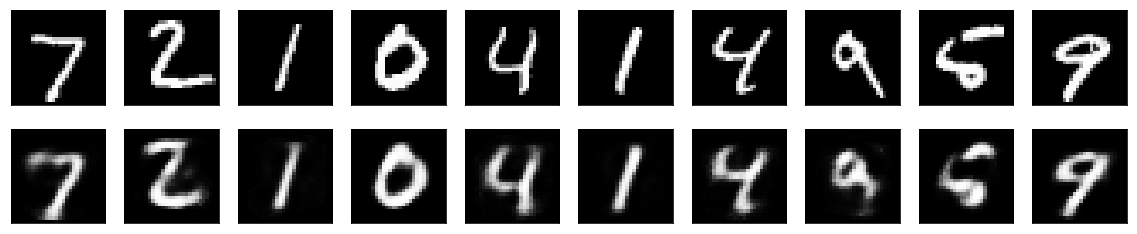

In [4]:
%matplotlib inline 

# use Matplotlib
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
from IPython.display import SVG
import pydot_ng as pydot
from keras.utils.vis_utils import model_to_dot
import os

os.environ["PATH"]+= os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\'

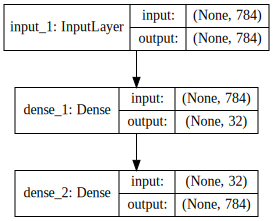

In [10]:
SVG(model_to_dot(autoencoder, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

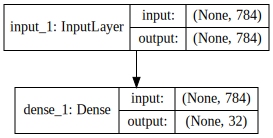

In [12]:
SVG(model_to_dot(encoder, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

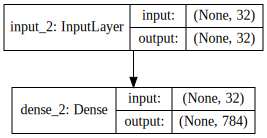

In [13]:
SVG(model_to_dot(decoder, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))